In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os


In [2]:
tf.test.gpu_device_name()

''

In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [4]:
def create_model():
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [5]:
base_model = create_model()
base_model.fit(train_images, 
               train_labels, 
               epochs=5, 
               validation_data = (test_images, test_labels)
            )


Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1437 - accuracy: 0.9558 - val_loss: 0.0574 - val_accuracy: 0.9827
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0388 - val_accuracy: 0.9874
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.0357 - val_accuracy: 0.9896
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0289 - val_accuracy: 0.9910


In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(train_images[i],axis=2), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
def digit_area(image):
    image = np.squeeze(image, axis=2)
    
    x_nonzero = np.nonzero(np.max(image,0))
    
    x_min = np.min(x_nonzero)
    x_max = np.max(x_nonzero)
    
    y_nonzero = np.nonzero(np.max(image,1))
    y_min = np.min(y_nonzero)
    y_max = np.max(y_nonzero)
    
    return [x_min, x_max, y_min, y_max]
    

array([[<AxesSubplot:title={'center':'x_min'}>,
        <AxesSubplot:title={'center':'x_max'}>],
       [<AxesSubplot:title={'center':'y_min'}>,
        <AxesSubplot:title={'center':'y_max'}>]], dtype=object)

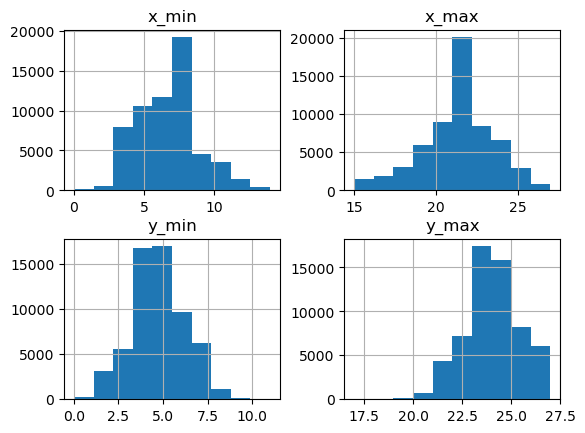

In [ ]:
digit_area_rows = []

for image in train_images:
    digit_area_row = digit_area(image)
    digit_area_rows.append(digit_area_row)
digit_area_df = pd.DataFrame(digit_area_rows, columns=['x_min', 'x_max', 'y_min', 'y_max']) 
digit_area_df.hist()

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
    )

train_generator = datagen.flow(train_images, train_labels, batch_size=32)
test_generator = datagen.flow(test_images, test_labels, batch_size=32)

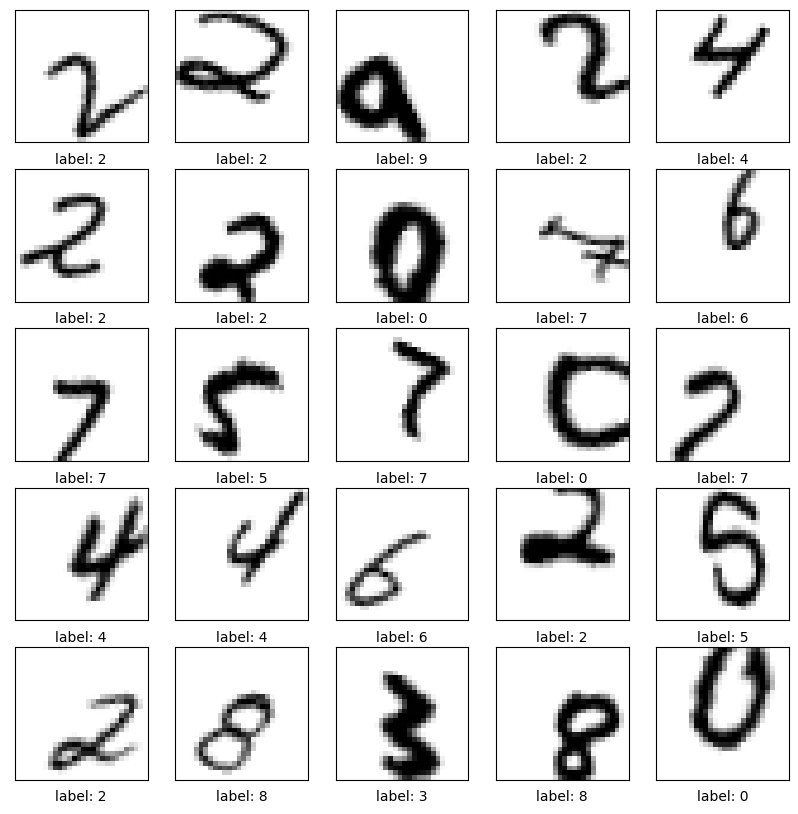

In [ ]:
augmented_images, augmented_labels = next(train_generator)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(augmented_images[i], axis=2), cmap=plt.cm.binary)
    plt.xlabel("label: %d" % augmented_labels[i])
plt.show()

In [ ]:
base_model.evaluate(test_generator)

NameError: name 'base_model' is not defined

In [ ]:
improved_model = create_model()
improved_model.fit(train_generator,epochs=5, validation_data=test_generator)